In [32]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model

## Create image data generator object


In [3]:
train_datagen = ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [4]:
test_datagen = ImageDataGenerator(rescale=1/255)

## Read the images

In [6]:
train = train_datagen.flow_from_directory('dataset/training_set',target_size=(64,64),class_mode='binary')

Found 13 images belonging to 2 classes.


In [7]:
train.filenames

['apple\\1.jpg',
 'apple\\2.jpeg',
 'apple\\3.jpeg',
 'apple\\4.jpeg',
 'apple\\5.jpg',
 'apple\\6.jpg',
 'apple\\7.jpg',
 'orange\\1.jpeg',
 'orange\\2.jpg',
 'orange\\3.jpeg',
 'orange\\4.jpeg',
 'orange\\5.jpg',
 'orange\\6.jpg']

(219, 230, 3)
(211, 238, 3)
(183, 276, 3)
(186, 271, 3)
(612, 612, 3)
(330, 300, 3)
(300, 300, 3)
(225, 225, 3)
(293, 300, 3)
(220, 229, 3)
(260, 194, 3)


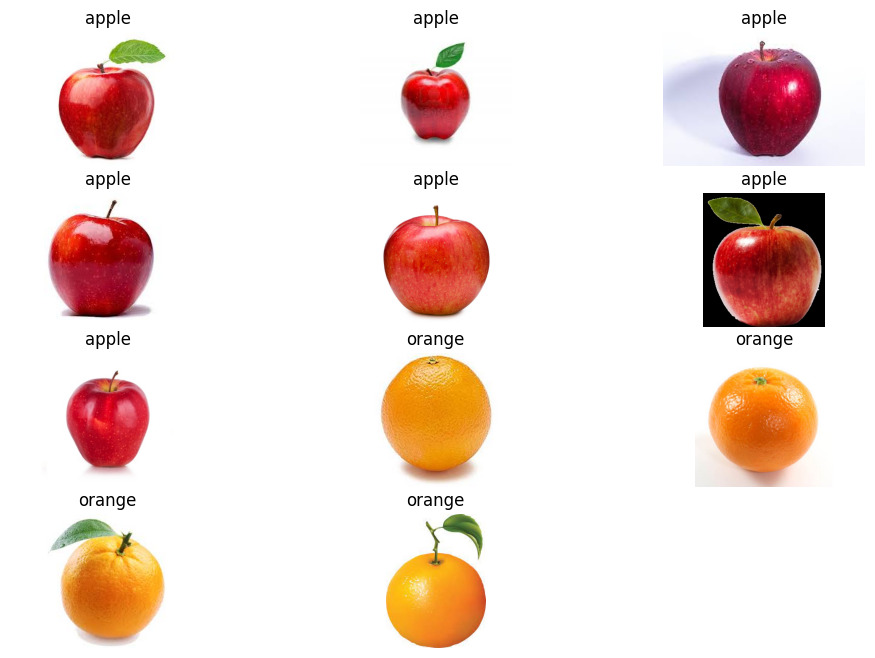

In [61]:
i=1
plt.figure(figsize=(12,8))
for fname in train.filenames:
    if i ==12:
        break
    img = plt.imread(train.directory+'/'+fname)
    plt.subplot(4,3,i)
    plt.axis('off')
    i+=1
    plt.title(fname.split("\\")[0])
    plt.imshow(img)

In [24]:
test = test_datagen.flow_from_directory('dataset/test_set',target_size=(64,64),class_mode='binary')

Found 6 images belonging to 2 classes.


## Build the model

In [26]:
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Conv2D(filters=8,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0

## Compile the model

In [27]:
model.compile(loss='binary_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [30]:
train.class_indices

{'apple': 0, 'orange': 1}

## Train the model

In [34]:
model.fit(train,epochs=20,validation_data=test)

Epoch 1/20


1/1 [==============================] - 2s 2s/step - loss: 0.6828 - accuracy: 0.5385 - val_loss: 0.6666 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 198ms/step - loss: 0.6740 - accuracy: 0.4615 - val_loss: 0.6622 - val_accuracy: 0.8333
Epoch 3/20
1/1 [==============================] - 0s 181ms/step - loss: 0.6571 - accuracy: 0.7692 - val_loss: 0.6658 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 204ms/step - loss: 0.6642 - accuracy: 0.5385 - val_loss: 0.6526 - val_accuracy: 0.6667
Epoch 5/20
1/1 [==============================] - 0s 217ms/step - loss: 0.6225 - accuracy: 0.5385 - val_loss: 0.6383 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 206ms/step - loss: 0.5927 - accuracy: 0.8462 - val_loss: 0.6202 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 199ms/step - loss: 0.5967 - accuracy: 0.8462 - val_loss: 0.6022 - val_accuracy: 1.0000
Epoch 8/20
1/1 [=====

## Evaluate the model

In [35]:
model.evaluate(test)

1/1 [==============================] - 0s 80ms/step - loss: 0.2275 - accuracy: 1.0000


[0.22754769027233124, 1.0]

## Predict

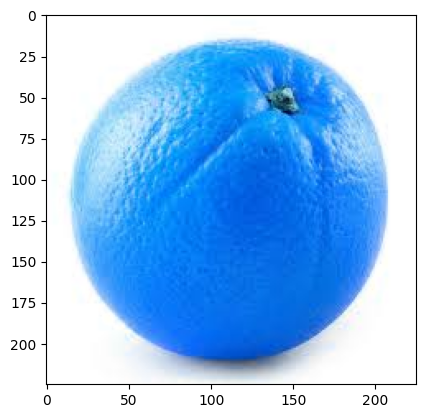

In [52]:
import cv2
img = cv2.imread('dataset/sample1.jpg')

In [53]:
img = cv2.resize(img,(64,64))


In [54]:
img = img.reshape(1,64,64,3)

In [57]:
round(model.predict(img)[0][0],0)

1/1 [==============================] - 0s 29ms/step


1.0

In [59]:
d=train.class_indices